In [2]:
# Importar las librerías necesarias
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
plt.style.use('default')
sns.set_palette("husl")

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [3]:
# Cargar el archivo CSV con Polars
print("Cargando el archivo listings.csv con Polars...")
df = pl.read_csv('listings.csv')

print(f"\nDataset cargado exitosamente!")
print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"\nPrimeras 5 filas del dataset:")
print(df.head())

Cargando el archivo listings.csv con Polars...

Dataset cargado exitosamente!
Dimensiones del dataset: 26067 filas y 79 columnas

Primeras 5 filas del dataset:
shape: (5, 79)
┌───────┬────────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ id    ┆ listing_ur ┆ scrape_id  ┆ last_scrap ┆ … ┆ calculate ┆ calculate ┆ calculate ┆ reviews_p │
│ ---   ┆ l          ┆ ---        ┆ ed         ┆   ┆ d_host_li ┆ d_host_li ┆ d_host_li ┆ er_month  │
│ i64   ┆ ---        ┆ i64        ┆ ---        ┆   ┆ stings_co ┆ stings_co ┆ stings_co ┆ ---       │
│       ┆ str        ┆            ┆ str        ┆   ┆ unt…      ┆ unt…      ┆ unt…      ┆ f64       │
│       ┆            ┆            ┆            ┆   ┆ ---       ┆ ---       ┆ ---       ┆           │
│       ┆            ┆            ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆           │
╞═══════╪════════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 35797 ┆ https:/

In [4]:
# Explorar la columna price
print("EXPLORACIÓN DE LA COLUMNA PRICE")
print("=" * 50)

# Verificar si existe la columna price
if 'price' in df.columns:
    print("✅ Columna 'price' encontrada")
    
    # Mostrar algunos ejemplos de valores
    print(f"\nEjemplos de valores en la columna price:")
    print(df.select('price').head(10))
    
    # Verificar tipos de datos únicos
    print(f"\nTipos de datos únicos en price (primeros 10):")
    print(df.select('price').unique().head(10))
    
    # Contar valores nulos
    null_count = df.select('price').null_count()
    print(f"\nValores nulos en price: {null_count}")
    
else:
    print("❌ Columna 'price' no encontrada")
    print("Columnas disponibles:")
    print(df.columns)

EXPLORACIÓN DE LA COLUMNA PRICE
✅ Columna 'price' encontrada

Ejemplos de valores en la columna price:
shape: (10, 1)
┌───────────┐
│ price     │
│ ---       │
│ str       │
╞═══════════╡
│ $3,982.00 │
│ null      │
│ $585.00   │
│ null      │
│ $1,015.00 │
│ null      │
│ $3,982.00 │
│ $327.00   │
│ $605.00   │
│ null      │
└───────────┘

Tipos de datos únicos en price (primeros 10):
shape: (10, 1)
┌────────────┐
│ price      │
│ ---        │
│ str        │
╞════════════╡
│ $888.00    │
│ $1,231.00  │
│ $5,286.00  │
│ $3,515.00  │
│ $667.00    │
│ $1,409.00  │
│ $4,993.00  │
│ $4,000.00  │
│ $1,914.00  │
│ $17,450.00 │
└────────────┘

Valores nulos en price: shape: (1, 1)
┌───────┐
│ price │
│ ---   │
│ u32   │
╞═══════╡
│ 3999  │
└───────┘


In [8]:
# Análisis detallado de la columna price
print("ANÁLISIS DETALLADO DE LA COLUMNA PRICE")
print("=" * 50)

if 'price' in df.columns:
    # Obtener estadísticas básicas
    print("Estadísticas básicas de la columna price:")
    print(df.select('price').describe())
    
    # Verificar patrones en los datos
    print(f"\nPrimeros 20 valores únicos:")
    unique_prices = df.select('price').unique().head(20)
    print(unique_prices)
    
    # Contar valores que contienen símbolos específicos
    price_col = df.select('price')
    
    # Verificar si hay valores con '$'
    has_dollar = price_col.filter(pl.col('price').str.contains('\\$')).height
    print(f"\nValores que contienen '$': {has_dollar}")
    
    # Verificar si hay valores con ','
    has_comma = price_col.filter(pl.col('price').str.contains(',')).height
    print(f"Valores que contienen ',': {has_comma}")
    
    # Verificar si hay valores con espacios
    has_space = price_col.filter(pl.col('price').str.contains(' ')).height
    print(f"Valores que contienen espacios: {has_space}")
    
    # Verificar valores nulos
    null_count = df.select('price').null_count()
    print(f"Valores nulos: {null_count}")
    
    # Mostrar algunos ejemplos de diferentes formatos
    print(f"\nEjemplos de diferentes formatos de precio:")
    sample_prices = df.select('price').filter(pl.col('price').is_not_null()).head(10)
    print(sample_prices)
    
    # Contar total de registros
    total_records = df.height
    print(f"\nTotal de registros: {total_records}")
    print(f"Registros con precio válido: {total_records - null_count}")
    print(f"Porcentaje de datos válidos: {((total_records - null_count) / total_records) * 100:.2f}%")

ANÁLISIS DETALLADO DE LA COLUMNA PRICE
Estadísticas básicas de la columna price:
shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ price     │
│ ---        ┆ ---       │
│ str        ┆ str       │
╞════════════╪═══════════╡
│ count      ┆ 22068     │
│ null_count ┆ 3999      │
│ mean       ┆ null      │
│ std        ┆ null      │
│ min        ┆ $1,000.00 │
│ 25%        ┆ null      │
│ 50%        ┆ null      │
│ 75%        ┆ null      │
│ max        ┆ $999.00   │
└────────────┴───────────┘

Primeros 20 valores únicos:
shape: (20, 1)
┌────────────┐
│ price      │
│ ---        │
│ str        │
╞════════════╡
│ $445.00    │
│ $4,112.00  │
│ $1,598.00  │
│ $3,823.00  │
│ $6,826.00  │
│ …          │
│ $1,376.00  │
│ $418.00    │
│ $1,889.00  │
│ $47,500.00 │
│ $224.00    │
└────────────┘

Valores que contienen '$': 22068
Valores que contienen ',': 11643
Valores que contienen espacios: 0
Valores nulos: shape: (1, 1)
┌───────┐
│ price │
│ ---   │
│ u32   │
╞═══════╡
│ 3999  │
└───────┘



TypeError: unsupported operand type(s) for -: 'int' and 'DataFrame'

In [ ]:
# Análisis detallado de la columna price
print("ANÁLISIS DETALLADO DE LA COLUMNA PRICE")
print("=" * 50)

if 'price' in df.columns:
    # Obtener estadísticas básicas
    print("Estadísticas básicas de la columna price:")
    print(df.select('price').describe())
    
    # Verificar patrones en los datos
    print(f"\nPrimeros 20 valores únicos:")
    unique_prices = df.select('price').unique().head(20)
    print(unique_prices)
    
    # Contar valores que contienen símbolos específicos
    price_col = df.select('price')
    
    # Verificar si hay valores con '$'
    has_dollar = price_col.filter(pl.col('price').str.contains('\\$')).height
    print(f"\nValores que contienen '$': {has_dollar}")
    
    # Verificar si hay valores con ','
    has_comma = price_col.filter(pl.col('price').str.contains(',')).height
    print(f"Valores que contienen ',': {has_comma}")
    
    # Verificar si hay valores con espacios
    has_space = price_col.filter(pl.col('price').str.contains(' ')).height
    print(f"Valores que contienen espacios: {has_space}")
    
    # Verificar valores nulos
    null_count = df.select('price').null_count()
    print(f"Valores nulos: {null_count}")
    
    # Mostrar algunos ejemplos de diferentes formatos
    print(f"\nEjemplos de diferentes formatos de precio:")
    sample_prices = df.select('price').filter(pl.col('price').is_not_null()).head(10)
    print(sample_prices)
    
    # Contar total de registros
    total_records = df.height
    print(f"\nTotal de registros: {total_records}")
    print(f"Registros con precio válido: {total_records - null_count}")
    print(f"Porcentaje de datos válidos: {((total_records - null_count) / total_records) * 100:.2f}%")

ANÁLISIS DETALLADO DE LA COLUMNA PRICE
Estadísticas básicas de la columna price:
shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ price     │
│ ---        ┆ ---       │
│ str        ┆ str       │
╞════════════╪═══════════╡
│ count      ┆ 22068     │
│ null_count ┆ 3999      │
│ mean       ┆ null      │
│ std        ┆ null      │
│ min        ┆ $1,000.00 │
│ 25%        ┆ null      │
│ 50%        ┆ null      │
│ 75%        ┆ null      │
│ max        ┆ $999.00   │
└────────────┴───────────┘

Primeros 20 valores únicos:
shape: (20, 1)
┌────────────┐
│ price      │
│ ---        │
│ str        │
╞════════════╡
│ $445.00    │
│ $4,112.00  │
│ $1,598.00  │
│ $3,823.00  │
│ $6,826.00  │
│ …          │
│ $1,376.00  │
│ $418.00    │
│ $1,889.00  │
│ $47,500.00 │
│ $224.00    │
└────────────┘

Valores que contienen '$': 22068
Valores que contienen ',': 11643
Valores que contienen espacios: 0
Valores nulos: shape: (1, 1)
┌───────┐
│ price │
│ ---   │
│ u32   │
╞═══════╡
│ 3999  │
└───────┘



TypeError: unsupported operand type(s) for -: 'int' and 'DataFrame'

In [9]:
# Análisis detallado de la columna price
print("ANÁLISIS DETALLADO DE LA COLUMNA PRICE")
print("=" * 50)

if 'price' in df.columns:
    # Obtener estadísticas básicas
    print("Estadísticas básicas de la columna price:")
    print(df.select('price').describe())
    
    # Verificar patrones en los datos
    print(f"\nPrimeros 20 valores únicos:")
    unique_prices = df.select('price').unique().head(20)
    print(unique_prices)
    
    # Contar valores que contienen símbolos específicos
    price_col = df.select('price')
    
    # Verificar si hay valores con '$'
    has_dollar = price_col.filter(pl.col('price').str.contains('\\$')).height
    print(f"\nValores que contienen '$': {has_dollar}")
    
    # Verificar si hay valores con ','
    has_comma = price_col.filter(pl.col('price').str.contains(',')).height
    print(f"Valores que contienen ',': {has_comma}")
    
    # Verificar si hay valores con espacios
    has_space = price_col.filter(pl.col('price').str.contains(' ')).height
    print(f"Valores que contienen espacios: {has_space}")
    
    # Verificar valores nulos (CORREGIDO)
    null_count = df.select('price').null_count().item()  # Extraer el valor numérico
    print(f"Valores nulos: {null_count}")
    
    # Mostrar algunos ejemplos de diferentes formatos
    print(f"\nEjemplos de diferentes formatos de precio:")
    sample_prices = df.select('price').filter(pl.col('price').is_not_null()).head(10)
    print(sample_prices)
    
    # Contar total de registros (CORREGIDO)
    total_records = df.height
    print(f"\nTotal de registros: {total_records}")
    print(f"Registros con precio válido: {total_records - null_count}")
    print(f"Porcentaje de datos válidos: {((total_records - null_count) / total_records) * 100:.2f}%")

ANÁLISIS DETALLADO DE LA COLUMNA PRICE
Estadísticas básicas de la columna price:
shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ price     │
│ ---        ┆ ---       │
│ str        ┆ str       │
╞════════════╪═══════════╡
│ count      ┆ 22068     │
│ null_count ┆ 3999      │
│ mean       ┆ null      │
│ std        ┆ null      │
│ min        ┆ $1,000.00 │
│ 25%        ┆ null      │
│ 50%        ┆ null      │
│ 75%        ┆ null      │
│ max        ┆ $999.00   │
└────────────┴───────────┘

Primeros 20 valores únicos:
shape: (20, 1)
┌────────────┐
│ price      │
│ ---        │
│ str        │
╞════════════╡
│ $546.00    │
│ $345.00    │
│ $3,283.00  │
│ $40,171.00 │
│ $1,650.00  │
│ …          │
│ $2,785.00  │
│ $1,128.00  │
│ $2,714.00  │
│ $2,818.00  │
│ $2,056.00  │
└────────────┘

Valores que contienen '$': 22068
Valores que contienen ',': 11643
Valores que contienen espacios: 0
Valores nulos: 3999

Ejemplos de diferentes formatos de precio:
shape: (10, 1)
┌───────────┐
│ price

In [10]:
# Limpiar y normalizar la columna price
print("LIMPIEZA Y NORMALIZACIÓN DE LA COLUMNA PRICE")
print("=" * 50)

if 'price' in df.columns:
    # Crear una nueva columna con precio limpio
    df_clean = df.with_columns([
        pl.col('price')
        .str.replace_all('\\$', '')  # Remover símbolos de dólar
        .str.replace_all(',', '')    # Remover comas
        .str.replace_all(' ', '')    # Remover espacios
        .cast(pl.Float64)            # Convertir a float
        .alias('price_clean')
    ])
    
    print("✅ Columna price_clean creada")
    
    # Mostrar estadísticas de la nueva columna
    print(f"\nEstadísticas de price_clean:")
    print(df_clean.select('price_clean').describe())
    
    # Verificar valores extremos
    print(f"\nValores mínimos y máximos:")
    print(f"Mínimo: {df_clean.select('price_clean').min()}")
    print(f"Máximo: {df_clean.select('price_clean').max()}")
    
    # Contar valores nulos después de la limpieza
    null_count_clean = df_clean.select('price_clean').null_count()
    print(f"Valores nulos después de limpieza: {null_count_clean}")
    
    # Mostrar algunos ejemplos de la transformación
    print(f"\nEjemplos de transformación:")
    comparison = df_clean.select(['price', 'price_clean']).head(10)
    print(comparison)

LIMPIEZA Y NORMALIZACIÓN DE LA COLUMNA PRICE
✅ Columna price_clean creada

Estadísticas de price_clean:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ price_clean │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 22068.0     │
│ null_count ┆ 3999.0      │
│ mean       ┆ 1665.005982 │
│ std        ┆ 4343.320622 │
│ min        ┆ 116.0       │
│ 25%        ┆ 630.0       │
│ 50%        ┆ 1055.0      │
│ 75%        ┆ 1722.0      │
│ max        ┆ 438053.0    │
└────────────┴─────────────┘

Valores mínimos y máximos:
Mínimo: shape: (1, 1)
┌─────────────┐
│ price_clean │
│ ---         │
│ f64         │
╞═════════════╡
│ 116.0       │
└─────────────┘
Máximo: shape: (1, 1)
┌─────────────┐
│ price_clean │
│ ---         │
│ f64         │
╞═════════════╡
│ 438053.0    │
└─────────────┘
Valores nulos después de limpieza: shape: (1, 1)
┌─────────────┐
│ price_clean │
│ ---         │
│ u32         │
╞═════════════╡
│ 3999        │
└─────

In [12]:
# Análisis de outliers en precios
print("ANÁLISIS DE OUTLIERS EN PRECIOS")
print("=" * 50)

if 'price_clean' in df_clean.columns:
    # Calcular estadísticas para detectar outliers
    price_stats = df_clean.select('price_clean').describe()
    
    # Obtener Q1, Q3 e IQR (CORREGIDO)
    q1 = df_clean.select('price_clean').quantile(0.25).item()  # Extraer valor numérico
    q3 = df_clean.select('price_clean').quantile(0.75).item()  # Extraer valor numérico
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}")
    
    # Contar outliers (CORREGIDO)
    outliers = df_clean.filter(
        (pl.col('price_clean') < lower_bound) | 
        (pl.col('price_clean') > upper_bound)
    )
    
    print(f"\nNúmero de outliers: {outliers.height}")
    print(f"Porcentaje de outliers: {(outliers.height / df_clean.height) * 100:.2f}%")
    
    # Mostrar algunos outliers
    print(f"\nEjemplos de outliers:")
    print(outliers.select(['price', 'price_clean']).head(10))

ANÁLISIS DE OUTLIERS EN PRECIOS
Q1: 630.0
Q3: 1722.0
IQR: 1092.0
Límite inferior: -1008.0
Límite superior: 3360.0

Número de outliers: 1757
Porcentaje de outliers: 6.74%

Ejemplos de outliers:
shape: (10, 2)
┌────────────┬─────────────┐
│ price      ┆ price_clean │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ $3,982.00  ┆ 3982.0      │
│ $3,982.00  ┆ 3982.0      │
│ $15,000.00 ┆ 15000.0     │
│ $3,783.00  ┆ 3783.0      │
│ $4,569.00  ┆ 4569.0      │
│ $6,530.00  ┆ 6530.0      │
│ $11,112.00 ┆ 11112.0     │
│ $3,548.00  ┆ 3548.0      │
│ $3,584.00  ┆ 3584.0      │
│ $3,548.00  ┆ 3548.0      │
└────────────┴─────────────┘


VISUALIZACIÓN DE LA DISTRIBUCIÓN DE PRECIOS


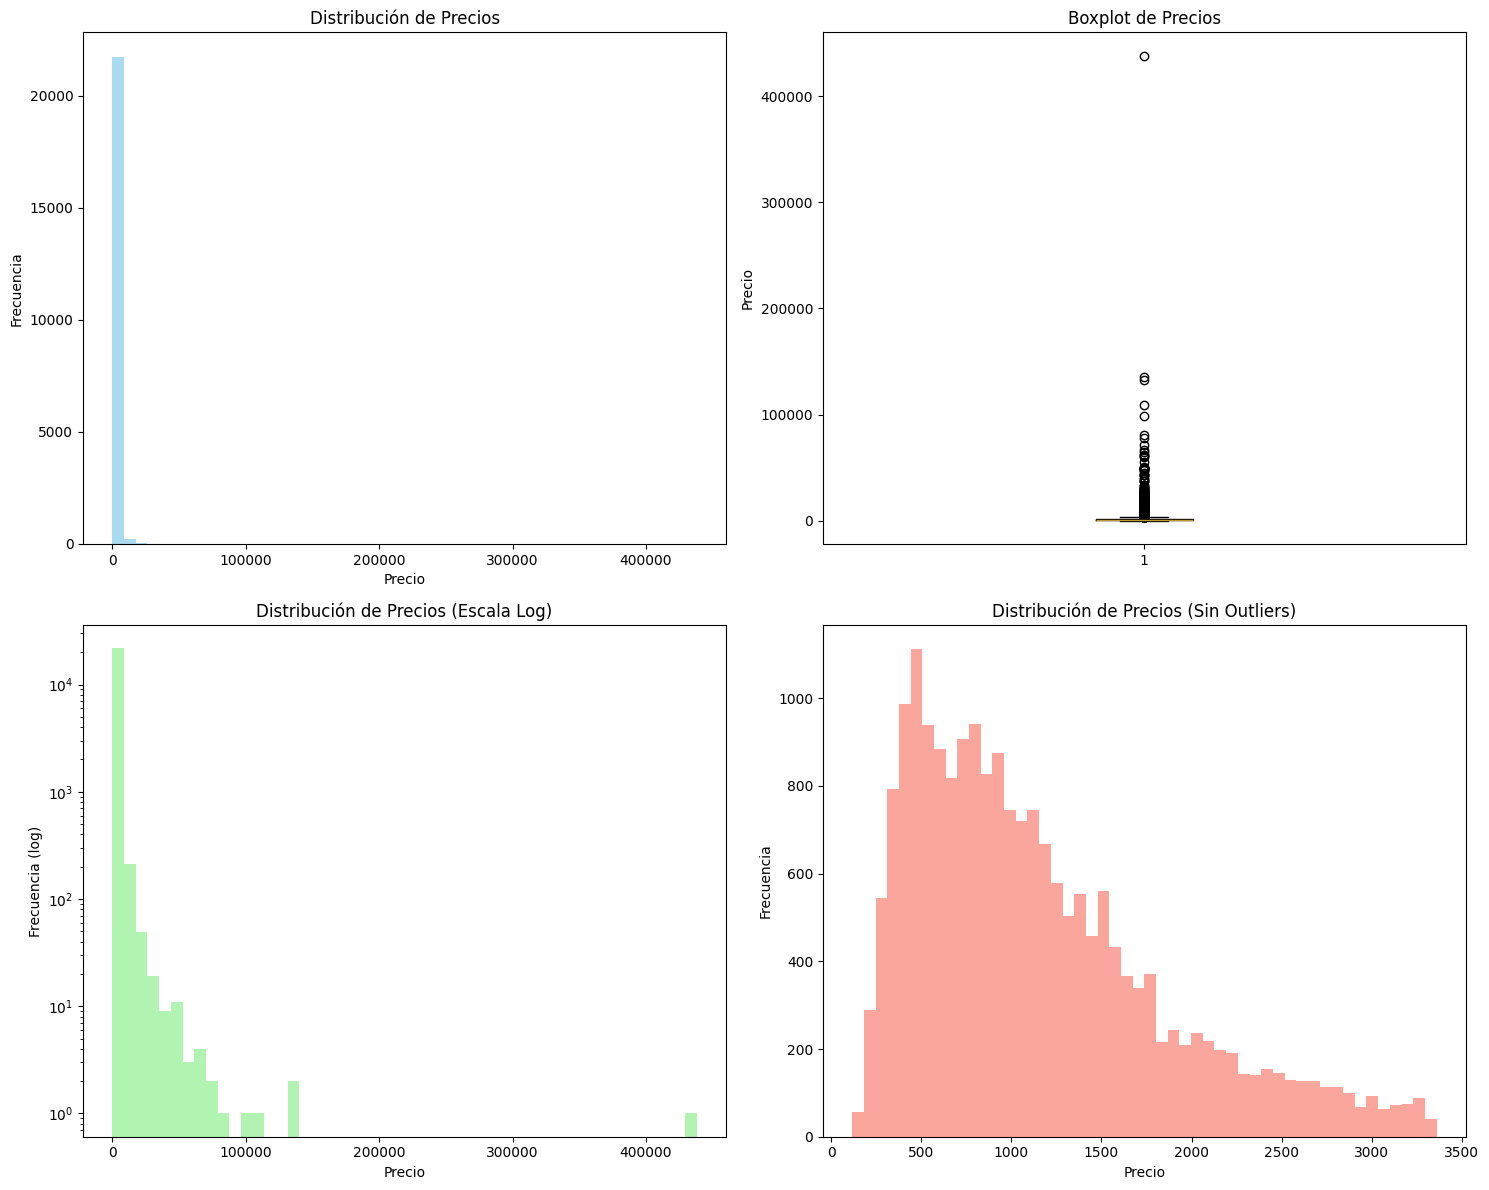

In [14]:
# Visualización de la distribución de precios
print("VISUALIZACIÓN DE LA DISTRIBUCIÓN DE PRECIOS")
print("=" * 50)

if 'price_clean' in df_clean.columns:
    # Extraer los datos de precio limpio para las gráficas
    price_data = df_clean.select('price_clean').filter(pl.col('price_clean').is_not_null()).to_series().to_list()
    
    # Crear gráficas
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Histograma de precios
    axes[0, 0].hist(price_data, bins=50, alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Distribución de Precios')
    axes[0, 0].set_xlabel('Precio')
    axes[0, 0].set_ylabel('Frecuencia')
    
    # 2. Boxplot
    axes[0, 1].boxplot(price_data)
    axes[0, 1].set_title('Boxplot de Precios')
    axes[0, 1].set_ylabel('Precio')
    
    # 3. Histograma logarítmico (para ver mejor la distribución)
    axes[1, 0].hist(price_data, bins=50, alpha=0.7, color='lightgreen')
    axes[1, 0].set_yscale('log')
    axes[1, 0].set_title('Distribución de Precios (Escala Log)')
    axes[1, 0].set_xlabel('Precio')
    axes[1, 0].set_ylabel('Frecuencia (log)')
    
    # 4. Histograma sin outliers
    # Calcular límites para outliers
    q1 = np.percentile(price_data, 25)
    q3 = np.percentile(price_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    price_filtered = [p for p in price_data if lower_bound <= p <= upper_bound]
    
    axes[1, 1].hist(price_filtered, bins=50, alpha=0.7, color='salmon')
    axes[1, 1].set_title('Distribución de Precios (Sin Outliers)')
    axes[1, 1].set_xlabel('Precio')
    axes[1, 1].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()